In [1]:
# In[1]: Library import

import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.utils import resample
from sklearn.feature_selection import SelectFromModel
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer #--->Only available in version >0.20.dev0
from sklearn.preprocessing import Imputer

import timeit


In [2]:
# In[2]: Import data

startzeitDaten = timeit.default_timer()

data = pd.read_csv(r"Datafiles\SP500_data_new.csv"
                   ,parse_dates = ["adate", "qdate", "public_date"], dayfirst = True)#, index_col=["gvkey", "datadate"]) 
data_NaN = data.dropna()
data_y = data.dropna(subset =["splticrm"])

Names1 = pd.read_excel(r"Names1.xlsx", header = 0)
Names1 = Names1.drop(["Data Type", "Help"], axis = 1)
Names1.columns = ["Name", "ExName"]
Names2 = pd.read_excel(r"Names2.xlsx", header = 0)
Names2 = Names2.drop(["Data Type","Help"], axis = 1)
Names2.columns = ["Name", "ExName"]

features1RF_mean = pd.read_csv(r"RF1_mean.csv", header = 0).dropna()
features1RF_mean.columns = ["Ort","Name", "Wert"]
features1RF_median = pd.read_csv(r"RF1_median.csv", header = 0).dropna()
features1RF_median.columns = ["Ort","Name", "Wert"]
features1RF_8 = pd.read_csv(r"RF1_8.csv", header = 0).dropna()
features1RF_8.columns = ["Ort","Name", "Wert"]

features2RF_mean = pd.read_csv(r"RF2_mean.csv", header = 0).dropna()
features2RF_mean.columns = ["Ort","Name", "Wert"]
features2RF_median = pd.read_csv(r"RF2_median.csv", header = 0).dropna()
features2RF_median.columns = ["Ort","Name", "Wert"]
features2RF_8 = pd.read_csv(r"RF2_8.csv", header = 0).dropna()
features2RF_8.columns = ["Ort","Name", "Wert"]

features1RBF_mean = pd.read_csv(r"RBF1_mean.csv", header = 0).dropna()
features1RBF_mean.columns = ["Ort","Name", "Wert"]
features1RBF_median = pd.read_csv(r"RBF1_median.csv", header = 0).dropna()
features1RBF_median.columns = ["Ort","Name", "Wert"]
features1RBF_8 = pd.read_csv(r"RBF1_8.csv", header = 0).dropna()
features1RBF_8.columns = ["Ort","Name", "Wert"]

features2RBF_mean = pd.read_csv(r"RBF2_mean.csv", header = 0).dropna()
features2RBF_mean.columns = ["Ort","Name", "Wert"]
features2RBF_median = pd.read_csv(r"RBF2_median.csv", header = 0).dropna()
features2RBF_median.columns = ["Ort","Name", "Wert"]
features2RBF_8 = pd.read_csv(r"RBF2_8.csv", header = 0).dropna()
features2RBF_8.columns = ["Ort","Name", "Wert"]

endzeitDaten = timeit.default_timer()
print("Zeit bis die Daten eingelesen sind: ",endzeitDaten-startzeitDaten)



Zeit bis die Daten eingelesen sind:  6.2734058390000005


In [3]:
# In[3] Edit data 

startEd = timeit.default_timer()

y1 = data_NaN.splticrm
y2 = data_y.splticrm

y1 = pd.Categorical(y1, ordered = True, categories = ['AAA', 'AA+', 'AA', 'AA-','A+', 'A', 'A-',
                                                      'BBB+', 'BBB', 'BBB-','BB+', 'BB']).codes
y2 = pd.Categorical(y2, ordered = True, categories = ['AAA', 'AA+', 'AA', 'AA-','A+', 'A', 'A-',
                                                      'BBB+', 'BBB', 'BBB-','BB+', 'BB', "BB-", "B+",
                                                      "B", "B-", "CCC+", "CCC", "D"]).codes

X1 = data_NaN.drop(["sic", "naics", "splticrm", "adate", "qdate","gvkey","conm",
                    "cusip", "tic", "CUSIP", "NCUSIP", "NWPERM",
                    "spcindcd", "spcseccd", "tic", "cusip", "public_date",
                    "PERMCO"], axis = 1)
X1_column_names = X1.columns.tolist()

X2 = data_y.drop(["sic", "naics", "splticrm", "adate", "qdate","gvkey","conm",
                    "cusip", "tic", "CUSIP", "NCUSIP", "NWPERM",
                    "spcindcd", "spcseccd", "tic", "cusip", "public_date",
                    "PERMCO"], axis = 1)
X2_column_names = X2.columns.tolist()

#Here we replace NaNs with the medain in the respective class, where possible else =0
#Use SimpleImputer if possible!

SimImp = SimpleImputer(missing_values = np.nan, strategy = "median")
SimImp = Imputer(missing_values = "NaN", strategy = "median")

X2_0 = SimImp.fit_transform(X2[y2==0])
X2_1 = SimImp.fit_transform(X2[y2==1])
X2_2 = SimImp.fit_transform(X2[y2==2])
X2_3 = SimImp.fit_transform(X2[y2==3])
X2_4 = SimImp.fit_transform(X2[y2==4])
X2_5 = SimImp.fit_transform(X2[y2==5])
X2_6 = SimImp.fit_transform(X2[y2==6])
X2_7 = SimImp.fit_transform(X2[y2==7])
X2_8 = SimImp.fit_transform(X2[y2==8])
X2_9 = SimImp.fit_transform(X2[y2==9])
X2_10 =SimImp.fit_transform(X2[y2==10])
X2_11 =SimImp.fit_transform(X2[y2==11])
X2_12 =SimImp.fit_transform(X2[y2==12])
X2_13 =SimImp.fit_transform(X2[y2==13])
X2_14 =SimImp.fit_transform(X2[y2==14])
X2_15 =(X2[y2==15])
X2_16 =(X2[y2==16])
X2_17 =(X2[y2==17]) 
X2_18 =(X2[y2==18])
#####################################################################################
#X2_15, X2_16, X2_17, X2_18 is left out because wohle columns are NaNs :            #
#"B-": y2==15, "CCC+": y2==16, "CCC": y2==17 and "D": y2 == 18                      #
# we will set all NaNs in these columns with 0                                      #
#####################################################################################

list_namesX = [X2_1, X2_2, X2_3, X2_4, X2_5, X2_6, X2_7, X2_8, X2_9, X2_10,
               X2_11, X2_12, X2_13, X2_14, X2_15, X2_16, X2_17, X2_18]

X2_imp = pd.DataFrame(X2_0, columns = X2_column_names)

for i in list_namesX :
    i = pd.DataFrame(i, columns = X2_column_names)
    X2_imp = X2_imp.append(i)

X2_imp = np.nan_to_num(X2_imp)
X2_imp = pd.DataFrame(X2_imp, columns = X2_column_names)

X2 = X2_imp.copy()

corr_frame1 = X1.assign(splticrm = y1)
corr_frame2 = X2_imp.assign(splticrm = y2)

#Construct balanced dataset with copies
rebaStart = timeit.default_timer()

y1_0,X1_0 =resample(y1[y1==0], X1[y1==0], replace = True, n_samples = 55, random_state = 0)
y1_1,X1_1 =resample(y1[y1==1], X1[y1==1], replace = True, n_samples = 55, random_state = 0)
y1_2,X1_2 =resample(y1[y1==2], X1[y1==2], replace = True, n_samples = 55, random_state = 0)
y1_3,X1_3 =resample(y1[y1==3], X1[y1==3], replace = True, n_samples = 55, random_state = 0)
y1_4,X1_4 =resample(y1[y1==4], X1[y1==4], replace = True, n_samples = 55, random_state = 0)
y1_5,X1_5 =resample(y1[y1==5], X1[y1==5], replace = True, n_samples = 55, random_state = 0)
y1_6,X1_6 =resample(y1[y1==6], X1[y1==6], replace = True, n_samples = 55, random_state = 0)
y1_7,X1_7 =resample(y1[y1==7], X1[y1==7], replace = True, n_samples = 55, random_state = 0)
y1_8,X1_8 =resample(y1[y1==8], X1[y1==8], replace = True, n_samples = 55, random_state = 0)
y1_9,X1_9 =resample(y1[y1==9], X1[y1==9], replace = True, n_samples = 55, random_state = 0)
y1_10,X1_10 =resample(y1[y1==10], X1[y1==10], replace = True, n_samples = 55, random_state = 0)
y1_11,X1_11 =resample(y1[y1==11], X1[y1==11], replace = True, n_samples = 55, random_state = 0)

list_namesX1 = [X1_1, X1_2, X1_3, X1_4, X1_5, X1_6, X1_7, X1_8, X1_9, X1_10, X1_11]
list_namesy1 = [y1_1, y1_2, y1_3, y1_4, y1_5, y1_6, y1_7, y1_8, y1_9, y1_10, y1_11]

X1_re = X1_0
for i in list_namesX1:
    X1_re = X1_re.append(i)

y1_re = pd.DataFrame(y1_0, columns = ["splticrm"])
for i in list_namesy1: 
    i = pd.DataFrame(i, columns = ["splticrm"])
    y1_re = y1_re.append(i)

y2_0,X2_0 =resample(y2[y2==0], X2_imp[y2==0], replace = True, n_samples = 55, random_state = 0)
y2_1,X2_1 =resample(y2[y2==1], X2_imp[y2==1], replace = True, n_samples = 55, random_state = 0)
y2_2,X2_2 =resample(y2[y2==2], X2_imp[y2==2], replace = True, n_samples = 55, random_state = 0)
y2_3,X2_3 =resample(y2[y2==3], X2_imp[y2==3], replace = True, n_samples = 55, random_state = 0)
y2_4,X2_4 =resample(y2[y2==4], X2_imp[y2==4], replace = True, n_samples = 55, random_state = 0)
y2_5,X2_5 =resample(y2[y2==5], X2_imp[y2==5], replace = True, n_samples = 55, random_state = 0)
y2_6,X2_6 =resample(y2[y2==6], X2_imp[y2==6], replace = True, n_samples = 55, random_state = 0)
y2_7,X2_7 =resample(y2[y2==7], X2_imp[y2==7], replace = True, n_samples = 55, random_state = 0)
y2_8,X2_8 =resample(y2[y2==8], X2_imp[y2==8], replace = True, n_samples = 55, random_state = 0)
y2_9,X2_9 =resample(y2[y2==9], X2_imp[y2==9], replace = True, n_samples = 55, random_state = 0)
y2_10,X2_10 =resample(y2[y2==10], X2_imp[y2==10], replace = True, n_samples = 55, random_state = 0)
y2_11,X2_11 =resample(y2[y2==11], X2_imp[y2==11], replace = True, n_samples = 55, random_state = 0)
y2_12,X2_12 =resample(y2[y2==12], X2_imp[y2==12], replace = True, n_samples = 55, random_state = 0)
y2_13,X2_13 =resample(y2[y2==13], X2_imp[y2==13], replace = True, n_samples = 55, random_state = 0)
y2_14,X2_14 =resample(y2[y2==14], X2_imp[y2==14], replace = True, n_samples = 55, random_state = 0)
y2_15,X2_15 =resample(y2[y2==15], X2_imp[y2==15], replace = True, n_samples = 55, random_state = 0)
y2_16,X2_16 =resample(y2[y2==16], X2_imp[y2==16], replace = True, n_samples = 55, random_state = 0)

list_namesX = [X2_1, X2_2, X2_3, X2_4, X2_5, X2_6, X2_7, X2_8, X2_9, X2_10,
               X2_11, X2_12, X2_13, X2_14, X2_15, X2_16]
list_namesy = [y2_1, y2_2, y2_3, y2_4, y2_5, y2_6, y2_7, y2_8, y2_9, y2_10,
               y2_11, y2_12, y2_13, y2_14, y2_15, y2_16]

X2_re = X2_0
for i in list_namesX:
    X2_re = X2_re.append(i)

y2_re = pd.DataFrame(y2_0, columns = ["splticrm"])
for i in list_namesy: 
    i = pd.DataFrame(i, columns = ["splticrm"])
    y2_re = y2_re.append(i)
    
rebaEnd = timeit.default_timer()
print("Rebalance time: ", rebaEnd-rebaStart)

X1_train_re, X1_test_re, y1_train_re, y1_test_re = train_test_split(X1_re ,y1_re ,test_size = 0.2)#, random_state = 0)
X2_train_re, X2_test_re, y2_train_re, y2_test_re = train_test_split(X2_re, y2_re, test_size = 0.2)#, random_state = 0)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1 ,y1 ,test_size = 0.2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2 ,y2 ,test_size = 0.2)

#Scaling
sc = StandardScaler()
X1_train = sc.fit_transform(X1_train)
X2_train = sc.fit_transform(X2_train)

X1_train_re = sc.fit_transform(X1_train_re)
X2_train_re = sc.fit_transform(X2_train_re)

PCA1_train = PCA(n_components = 8).fit(X1_train).transform(X1_train)
PCA2_train = PCA(n_components = 8).fit(X2_train).transform(X2_train)
PCA1_test = PCA(n_components = 8).fit(X1_test).transform(X1_test)
PCA2_test = PCA(n_components = 8).fit(X2_test).transform(X2_test)

PCA1_train_re = PCA(n_components = 8).fit(X1_train_re).transform(X1_train_re)
PCA2_train_re = PCA(n_components = 8).fit(X2_train_re).transform(X2_train_re)
PCA1_test_re = PCA(n_components = 8).fit(X1_test_re).transform(X1_test_re)
PCA2_test_re = PCA(n_components = 8).fit(X2_test_re).transform(X2_test_re)

y1_train_re = np.array(y1_train_re).ravel()
y2_train_re = np.array(y2_train_re).ravel()

y1_train = np.array(y1_train).ravel()
y2_train = np.array(y2_train).ravel()

forest = RandomForestClassifier(max_depth = None, n_estimators = 50, random_state = 0, n_jobs = -1)
forestBoost = GradientBoostingClassifier(max_depth = None, n_estimators = 50, random_state = 0)
MLP = MLPClassifier( random_state = 0)
svm = SVC( random_state = 0)
knn = KNeighborsClassifier()

Names = np.vstack((Names1, Names2))
Names = pd.DataFrame(Names, columns = ["Name", "ExName"])
mydict = dict(zip(Names.Name, Names.ExName))

if X1_column_names != X2_column_names:
    X1_columns = pd.DataFrame(X1_column_names, columns = ["Name"])
    X1_columns = X1_columns.replace(mydict)
    X1_column_names = pd.DataFrame(X1_column_names)
    Named1 = np.hstack((X1_column_names, X1_columns))
    
    X2_columns = pd.DataFrame(X2_column_names, columns = ["Name"])
    X2_columns = X1_columns.replace(mydict)
    X2_column_names = pd.DataFrame(X2_column_names)
    Named2 = np.hstack((X2_column_names, X2_columns))
    print("Columns of X1 and X2 are NOT equal")
    
else:
    X1_columns = pd.DataFrame(X1_column_names, columns = ["Name"])
    X1_columns = X1_columns.replace(mydict)
    X1_column_names = pd.DataFrame(X1_column_names)
    Named = np.hstack((X1_column_names, X1_columns))
    print("Column names are equal")

Named = pd.DataFrame(Named , columns = ["Name", "ExName"])

endEd = timeit.default_timer()
print("Edit time: ", endEd-startEd)


C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Rebalance time:  0.043962763999999765
Column names are equal
Edit time:  0.605651945


Corr_NaN:  ggroup            -0.018596
gind              -0.018605
gsector           -0.019850
gsubind           -0.018605
PERMNO             0.232061
PRC               -0.126613
CAPEI             -0.022799
bm                 0.236052
evm               -0.074413
pe_op_basic        0.060870
pe_op_dil          0.063152
pe_exi             0.081961
pe_inc             0.060827
ps                -0.163079
pcf               -0.058113
dpr               -0.087553
npm               -0.237697
opmbd             -0.151896
opmad             -0.189421
gpm               -0.249619
ptpm              -0.251875
cfm               -0.175856
roa               -0.234538
roe               -0.121150
roce              -0.235115
efftax             0.011372
aftret_eq         -0.090015
aftret_invcapx    -0.272159
aftret_equity     -0.086816
pretret_noa       -0.092748
                     ...   
cash_debt         -0.205712
fcf_ocf           -0.108657
lt_ppent           0.038976
dltt_be            0.029654
debt_asse

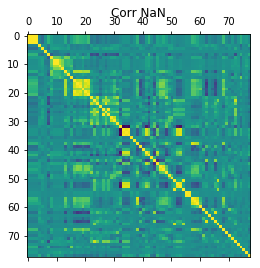

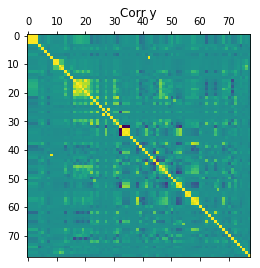

In [4]:
# In[4]: Simple Correlation for every Feature on the Label-Vector

startzeitCor = timeit.default_timer()

corr_NaN = corr_frame1.corr()
print("Corr_NaN: ", corr_NaN.splticrm)
corr_NaN.splticrm.to_csv("Corr_NaN.csv")
fig1 = plt.figure()
plt.matshow(corr_NaN)
plt.title("Corr NaN")
#plt.show()
plt.close(fig1)

corr_y = corr_frame2.corr()
print("Corr y: ", corr_y.splticrm)
corr_y.splticrm.to_csv("Corr_y.csv")
plt.matshow(corr_y)
plt.title("Corr y")
#plt.show()


endzeitCor = timeit.default_timer()

print("Corrolation time: ", endzeitCor-startzeitCor)



In [5]:
# In[5]: Regression-Plots for NOT resampled Data

startzeitregplot = timeit.default_timer()

counter = 0
for i in range(len(X1_column_names)):
    stime = timeit.default_timer()    
    regfig = plt.figure()
    regfig = sns.regplot(x= X1.iloc[:,i], y=y1)
    plt.title(str(X1_column_names.iloc[i,0]))
    saver = str(X1_column_names.iloc[i,0])+"1"+".png"
    plt.savefig(saver)
    plt.close()
    counter = counter +1
    time = timeit.default_timer()
    #print(counter)
    #print("Zeit regplot1: ", time -stime)

counter = 0
for i in range(len(X2_column_names)):
    stime2 = timeit.default_timer()    
    regfig = plt.figure()
    regfig = sns.regplot(x= X2.iloc[:,i], y=y2)
    plt.title(str(X2_column_names[i]))
    saver = str(X2_column_names[i])+"2"+".png"
    plt.savefig(saver)
    plt.close()
    counter = counter +1
    time2 = timeit.default_timer()
    #print(counter)
    #print("Zeit regplot2: ", time2 -stime2)
    
endzeitregplots = timeit.default_timer()

print("time: ", endzeitregplots-startzeitregplot)



C:\Users\Franck\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


time:  87.226026328


In [6]:
# In[6]: Rnd_Forest Classifier

startzeitRF = timeit.default_timer()

score1 = forest.fit(X1_train, y1_train).score(X1_test, y1_test)
score2 = forest.fit(X2_train, y2_train).score(X2_test, y2_test)
scorePCA1 = forest.fit(PCA1_train, y1_train).score(PCA1_test, y1_test)
scorePCA2 = forest.fit(PCA2_train, y2_train).score(PCA2_test, y2_test)

scoreboost1 = forestBoost.fit(X1_train, y1_train).score(X1_test, y1_test)
scoreboost2 = forestBoost.fit(X2_train, y2_train).score(X2_test, y2_test)
scoreboostPCA1 = forestBoost.fit(PCA1_train, y1_train).score(PCA1_test, y1_test)
scoreboostPCA2 = forestBoost.fit(PCA2_train, y2_train).score(PCA2_test, y2_test)

score1_re = forest.fit(X1_train_re, y1_train_re).score(X1_test_re, y1_test_re)
score2_re = forest.fit(X2_train_re, y2_train_re).score(X2_test_re, y2_test_re)
scorePCA1_re = forest.fit(PCA1_train_re, y1_train_re).score(PCA1_test_re, y1_test_re)
scorePCA2_re = forest.fit(PCA2_train_re, y2_train_re).score(PCA2_test_re, y2_test_re)

scoreboost1_re = forestBoost.fit(X1_train_re, y1_train_re).score(X1_test_re, y1_test_re)
scoreboost2_re = forestBoost.fit(X2_train_re, y2_train_re).score(X2_test_re, y2_test_re)
scoreboostPCA1_re = forestBoost.fit(PCA1_train_re, y1_train_re).score(PCA1_test_re, y1_test_re)
scoreboostPCA2_re = forestBoost.fit(PCA2_train_re, y2_train_re).score(PCA2_test_re, y2_test_re)

endzeitRF =timeit.default_timer()

print("Not resampled Data: ")
print("Score 1: ", score1,"Score 2: ", score2)
print("Score 1 PCA: ", scorePCA1, "Score 2 PCA: ", scorePCA2)
print("Boost Score 1: ", scoreboost1, "Boost Score 2 : ", scoreboost2)
print("Boost Score PCA 1: ", scoreboostPCA1, "Boost Score PCA 2: ", scoreboostPCA2)
print(" ")
print("Resampled Data: ")
print("Score 1: ", score1_re,"Score 2: ", score2_re)
print("Score 1 PCA: ", scorePCA1_re, "Score 2 PCA: ", scorePCA2_re)
print("Boost Score 1: ", scoreboost1_re, "Boost Score 2 : ", scoreboost2_re)
print("Boost Score PCA 1: ", scoreboostPCA1_re, "Boost Score PCA 2: ",scoreboostPCA2_re)
print(" ")
print("Zeit für den Random Forest Algorithmus: ", endzeitRF-startzeitRF)


Not resampled Data: 
Score 1:  0.20360970107163 Score 2:  0.11572796623924687
Score 1 PCA:  0.17371686407219403 Score 2 PCA:  0.144944002596981
Boost Score 1:  0.16638465877044556 Boost Score 2 :  0.08894659957799059
Boost Score PCA 1:  0.13931190073322053 Boost Score PCA 2:  0.13439376724557703
 
Resampled Data: 
Score 1:  0.10606060606060606 Score 2:  0.0962566844919786
Score 1 PCA:  0.05303030303030303 Score 2 PCA:  0.026737967914438502
Boost Score 1:  0.09090909090909091 Boost Score 2 :  0.0374331550802139
Boost Score PCA 1:  0.11363636363636363 Boost Score PCA 2:  0.0374331550802139
 
Zeit für den Random Forest Algorithmus:  724.472733802


In [7]:
# In[7] Support Vectore Machines: Linear, Polynomial and Gaussian

startzeitSVM = timeit.default_timer()

svm_linear = SVC(kernel = "linear", random_state = 0)
svm_linearPCA = SVC(kernel = "linear", random_state = 0)
svm_poly = SVC(kernel = "poly", random_state = 0)
svm_polyPCA = SVC(kernel = "poly", random_state = 0)
svm_gaussian = SVC(random_state = 0)
svm_gaussianPCA = SVC(random_state = 0)

svmzeit = timeit.default_timer()

svm_linear_fit1 = svm_linear.fit(X1_train, y1_train)
svm_linear_fit2 = svm_linear.fit(X2_train, y2_train)
svm_linear_PCA_fit1 = svm_linearPCA.fit(PCA1_train, y1_train)
svm_linear_PCA_fit2 = svm_linearPCA.fit(PCA2_train, y2_train)
svm1 = timeit.default_timer()
print("Zeit für svm linear fit: ", svm1-svmzeit)
"""
svm_poly_fit1 = svm_poly.fit(X1_train, y1_train)
svm_poly_fit2 = svm_poly.fit(X2_train, y2_train)
svm_poly_PCA_fit1 = svm_polyPCA.fit(PCA1_train, y1_train)
svm_poly_PCA_fit2 = svm_polyPCA.fit(PCA2_train, y2_train)
svm2 = timeit.default_timer()
print("Zeit für svm poly fit: ", svm2-svm1)
"""
svm_gaussian_fit1 = svm_gaussian.fit(X1_train, y1_train)
svm_gaussian_fit2 = svm_gaussian.fit(X2_train, y2_train)
svm_gaussian_PCA_fit1 = svm_gaussianPCA.fit(PCA1_train, y1_train)
svm_gaussian_PCA_fit2 = svm_gaussianPCA.fit(PCA2_train, y2_train)
svm4 = timeit.default_timer()
print("Zeit für gaussian fit: ", svm4-svm2)

score_linear1 = svm_linear_fit1.score(X1_test, y1_test)
score_linear2 = svm_linear_fit2.score(X2_test, y2_test)
score_linear1PCA = svm_linear_PCA_fit1.score(PCA1_test, y1_test)
score_linear2PCA = svm_linear_PCA_fit2.score(PCA2_test, y2_test)
svm3 = timeit.default_timer()
print("Zeit für linear score : ", svm3-svm2)
"""
score_poly1 = svm_poly_fit1.score(X1_test, y1_test)
score_poly2 = svm_poly_fit2.score(X2_test, y2_test)
score_poly1PCA = svm_poly_PCA_fit1.score(PCA1_test, y1_test)
score_poly2PCA = svm_poly_PCA_fit2.score(PCA2_test, y2_test)
svm4 = timeit.default_timer()
print("Zeit für poly score : ", svm4-svm3)
"""
score_gauss1 = svm_gaussian_fit1.score(X1_test, y1_test)
score_gauss2 = svm_gaussian_fit2.score(X2_test, y2_test)
score_gauss1PCA = svm_gaussian_PCA_fit1.score(PCA1_test, y1_test)
score_gauss2PCA = svm_gaussian_PCA_fit2.score(PCA2_test, y2_test)
svm7 = timeit.default_timer()
print("Zeit für gaussian score: ",svm7-svm4 )

svmendzeit = timeit.default_timer()
print("SVM zeit: ", svmendzeit -svmzeit)
print(" ")
print("Not resampled Data: ")
print("Linear : ", "Score 1: ", score_linear1, "Score 2: ", score_linear2) 
print("Linear PCA: ",  "Score 1: ", score_linear1PCA, "Score 2: ", score_linear2PCA)
#print("Poly: ", "Score 1: ", score_poly1, "Score 2: ", score_poly2)
#print("Poly PCA: ", "Score 1: ", score_poly1PCA, "Score 2: ", score_poly2PCA)
print("Gaussian: ","Score 1: ", score_gauss1, "Score 2 : ", score_gauss2)
print("Gaussian PCA: ","Score 1: ", score_gauss1PCA, "Score 2 : ", score_gauss2PCA)

Zeit für svm linear fit:  249.39274305799995


C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Zeit für svm poly fit:  336.46705255200004


C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Zeit für gaussian fit:  86.42967362200011
Zeit für linear score :  103.54155977599999
Zeit für poly score :  17.086253236999937
Zeit für gaussian score:  32.003344092000134
SVM zeit:  738.4914374090001
 
Not resampled Data: 
Linear :  Score 1:  0.0 Score 2:  0.00032462262619704593
Linear PCA:  Score 1:  0.0056401579244218835 Score 2:  0.007304009089433534
Poly:  Score 1:  0.0 Score 2:  0.00032462262619704593
Poly PCA:  Score 1:  0.1410039481105471 Score 2:  0.08845966563869502
Gaussian:  Score 1:  0.16412859560067683 Score 2 :  0.18763187794189254
Gaussian PCA:  Score 1:  0.16412859560067683 Score 2 :  0.18763187794189254


In [8]:

#Same for resampled Data
svm_linear_fit1_re = svm_linear.fit(X1_train_re, y1_train_re)
svm_linear_fit2_re = svm_linear.fit(X2_train_re, y2_train_re)
svm_linear_PCA_fit1_re = svm_linearPCA.fit(PCA1_train_re, y1_train_re)
svm_linear_PCA_fit2_re = svm_linearPCA.fit(PCA2_train_re, y2_train_re)
svm1 = timeit.default_timer()
print("Zeit für svm linear fit: ", svm1-svm7)
"""
svm_poly_fit1_re = svm_poly.fit(X1_train_re, y1_train_re)
svm_poly_fit2_re = svm_poly.fit(X2_train_re, y2_train_re)
svm_poly_PCA_fit1_re = svm_polyPCA.fit(PCA1_train_re, y1_train_re)
svm_poly_PCA_fit2_re = svm_polyPCA.fit(PCA2_train_re, y2_train_re)
svm2 = timeit.default_timer()
print("Zeit für svm poly fit: ", svm2-svm1)
"""
svm_gaussian_fit1_re = svm_gaussian.fit(X1_train_re, y1_train_re)
svm_gaussian_fit2_re = svm_gaussian.fit(X2_train_re, y2_train_re)
svm_gaussian_PCA_fit1_re = svm_gaussianPCA.fit(PCA1_train_re, y1_train_re)
svm_gaussian_PCA_fit2_re = svm_gaussianPCA.fit(PCA2_train_re, y2_train_re)
svm4 = timeit.default_timer()
print("Zeit für gaussian fit: ", svm4-svm2)

score_linear1_re = svm_linear_fit1_re.score(X1_test_re, y1_test_re)
score_linear2_re = svm_linear_fit2_re.score(X2_test_re, y2_test_re)
score_linear1PCA_re = svm_linear_PCA_fit1_re.score(PCA1_test_re, y1_test_re)
score_linear2PCA_re = svm_linear_PCA_fit2_re.score(PCA2_test_re, y2_test_re)
svm3 = timeit.default_timer()
print("Zeit für linear score : ", svm3-svm2)
"""
score_poly1_re = svm_poly_fit1_re.score(X1_test_re, y1_test_re)
score_poly2_re = svm_poly_fit2_re.score(X2_test_re, y2_test_re)
score_poly1PCA_re = svm_poly_PCA_fit1_re.score(PCA1_test_re, y1_test_re)
score_poly2PCA_re = svm_poly_PCA_fit2_re.score(PCA2_test_re, y2_test_re)
svm4 = timeit.default_timer()
print("Zeit für poly score : ", svm4-svm3)
"""
score_gauss1_re = svm_gaussian_fit1_re.score(X1_test_re, y1_test_re)
score_gauss2_re = svm_gaussian_fit2_re.score(X2_test_re, y2_test_re)
score_gauss1PCA_re = svm_gaussian_PCA_fit1_re.score(PCA1_test_re, y1_test_re)
score_gauss2PCA_re = svm_gaussian_PCA_fit2_re.score(PCA2_test_re, y2_test_re)
svm7 = timeit.default_timer()
print("Zeit für gaussian score: ",svm7-svm4 )


print(" ")
print("Resampled Data: ")
print("Linear : ", "Score 1: ", score_linear1_re, "Score 2: ", score_linear2_re)
print("Linear PCA: ", "Score 1: ", score_linear1PCA_re, "Score 2: ", score_linear2PCA_re)
#print("Poly: ", "Score 1: ", score_poly1_re, "Score 2: ", score_poly2_re) 
#print("Poly PCA: ", "Score 1: ", score_poly1PCA_re, "Score 2: ", score_poly2PCA_re)
print("Gaussian: ","Score 1: ", score_gauss1_re, "Score 2 : ", score_gauss2_re)
print("Gaussian PCA: ","Score 1: ", score_gauss1PCA_re, "Score 2 : ", score_gauss2PCA_re)



Zeit für svm linear fit:  0.2707544099998813
Zeit für svm poly fit:  0.14397783100002925


C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureW

Zeit für gaussian fit:  0.14485993400012376
Zeit für linear score :  0.16452829500008193
Zeit für poly score :  0.02048024600003373
Zeit für gaussian score:  0.039513482999836924
 
Resampled Data: 
Linear :  Score 1:  0.045454545454545456 Score 2:  0.06951871657754011
Linear PCA:  Score 1:  0.022727272727272728 Score 2:  0.0748663101604278
Poly:  Score 1:  0.045454545454545456 Score 2:  0.06951871657754011
Poly PCA:  Score 1:  0.12878787878787878 Score 2:  0.11764705882352941
Gaussian:  Score 1:  0.08333333333333333 Score 2 :  0.0427807486631016
Gaussian PCA:  Score 1:  0.08333333333333333 Score 2 :  0.0427807486631016


In [9]:
# In[8] Bagging Classifier with SVM: Gaussian, Rnd_forest and NeuralNetwork: MLP-Classifier

startBag = timeit.default_timer()

model_SVM = BaggingClassifier(base_estimator = svm, n_estimators = 50, random_state = 1)
score_SVM_bag1 = model_SVM.fit(X1_train, y1_train).score(X1_test, y1_test)
score_SVM_bag2 = model_SVM.fit(X2_train, y2_train).score(X2_test, y2_test)
score_SVM_bag1PCA = model_SVM.fit(PCA1_train, y1_train).score(PCA1_test, y1_test)
score_SVM_bag2PCA = model_SVM.fit(PCA2_train, y2_train).score(PCA2_test, y2_test)
bag3 = timeit.default_timer()
print("SVM:Gaussian bagging score time: ", bag3-startBag)

model_forest = BaggingClassifier(base_estimator = forest, n_estimators = 50, random_state = 1)
score_forest_bag1 = model_forest.fit(X1_train, y1_train).score(X1_test, y1_test)
score_forest_bag2 = model_forest.fit(X2_train, y2_train).score(X2_test, y2_test)
score_forest_bag1PCA = model_forest.fit(PCA1_train, y1_train).score(PCA1_test, y1_test)
score_forest_bag2PCA = model_forest.fit(PCA2_train, y2_train).score(PCA2_test, y2_test)
bag1 = timeit.default_timer()
print("forest bagging time: ", bag1-bag3)
"""
model_MLP = BaggingClassifier(base_estimator = MLP, n_estimators = 50, random_state = 1)
score_MLP_bag1 = model_MLP.fit(X1_train, y1_train).score(X1_test, y1_test)
score_MLP_bag2 = model_MLP.fit(X2_train, y2_train).score(X2_test, y2_test)
score_MLP_bag1PCA = model_MLP.fit(PCA1_train, y1_train).score(PCA1_test, y1_test)
score_MLP_bag2PCA = model_MLP.fit(PCA2_train, y2_train).score(PCA2_test, y2_test)
bag2 = timeit.default_timer()
print("NeuralNetwork bagging score time: ", bag2-bag1)
"""
#Same for resampled Data:
score_SVM_bag1_re = model_SVM.fit(X1_train_re, y1_train_re).score(X1_test_re, y1_test_re)
score_SVM_bag2_re = model_SVM.fit(X2_train_re, y2_train_re).score(X2_test_re, y2_test_re)
score_SVM_bag1PCA_re = model_SVM.fit(PCA1_train_re, y1_train_re).score(PCA1_test_re, y1_test_re)
score_SVM_bag2PCA_re = model_SVM.fit(PCA2_train_re, y2_train_re).score(PCA2_test_re, y2_test_re)
bag3 = timeit.default_timer()
print("SVM:Gaussian bagging score time: ", bag3-startBag)

score_forest_bag1_re = model_forest.fit(X1_train_re, y1_train_re).score(X1_test_re, y1_test_re)
score_forest_bag2_re = model_forest.fit(X2_train_re, y2_train_re).score(X2_test_re, y2_test_re)
score_forest_bag1PCA_re = model_forest.fit(PCA1_train_re, y1_train_re).score(PCA1_test_re, y1_test_re)
score_forest_bag2PCA_re = model_forest.fit(PCA2_train_re, y2_train_re).score(PCA2_test_re, y2_test_re)
bag1 = timeit.default_timer()
print("forest bagging time: ", bag1-bag3)
"""
score_MLP_bag1_re = model_MLP.fit(X1_train_re, y1_train_re).score(X1_test_re, y1_test_re)
score_MLP_bag2_re = model_MLP.fit(X2_train_re, y2_train_re).score(X2_test_re, y2_test_re)
score_MLP_bag1PCA_re = model_MLP.fit(PCA1_train_re, y1_train_re).score(PCA1_test_re, y1_test_re)
score_MLP_bag2PCA_re = model_MLP.fit(PCA2_train_re, y2_train_re).score(PCA2_test_re, y2_test_re)
bag2 = timeit.default_timer()
print("NeuralNetwork bagging score time: ", bag2-bag1)
"""
endbag = timeit.default_timer()
print("Not resampled Data: ")
print("BagTime total : ", endbag-startBag)
print("SVM:Gaussian: ","Score1: ", score_SVM_bag1,"Score2: ", score_SVM_bag2)
print("SVM:Gaussian PCA: ","Score1: ", score_SVM_bag1PCA,"Score2: ", score_SVM_bag2PCA)
print("Forest: ", "Score1: ", score_forest_bag1, "Score2 :", score_forest_bag2)
print("Forest PCA: ", "Score1: ", score_forest_bag1PCA, "Score2 :", score_forest_bag2PCA)
#print("NeuralNetwork: ","Score1: ", score_MLP_bag1, "Score2: ", score_MLP_bag2)
#print("NeuralNetwork PCA: ","Score1: ", score_MLP_bag1PCA, "Score2: ", score_MLP_bag2PCA)
print(" ")
print("Resampled Data: ")
print("BagTime total : ", endbag-startBag)
print("SVM:Gaussian: ", "Score1: ", score_SVM_bag1_re, "Score2: ", score_SVM_bag2_re)
print("SVM:Gaussian PCA: ", "Score1: ", score_SVM_bag1PCA_re, "Score2: ", score_SVM_bag2PCA_re)
print("Forest: ", "Score1: ", score_forest_bag1_re, "Score2 :", score_forest_bag2_re)
print("Forest PCA: ", "Score1: ", score_forest_bag1PCA_re, "Score2 :", score_forest_bag2PCA_re)
#print("NeuralNetwork: ", "Score1: ", score_MLP_bag1_re, "Score2: ", score_MLP_bag2_re)
#print("NeuralNetwork PCA: ", "Score1: ", score_MLP_bag1PCA_re, "Score2: ", score_MLP_bag2PCA_re)
print(" ")

endendbag = timeit.default_timer()

print("Bagging total time: ", endendbag-endbag)



C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureW

C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureW

C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureW

C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureW

SVM:Gaussian bagging score time:  2607.2314613310004
forest bagging time:  119.50068534899947


C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureW

C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureW

C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureW

C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureW

SVM:Gaussian bagging score time:  2731.1681364319998
forest bagging time:  35.882362377999925
Not resampled Data: 
BagTime total :  2767.051050795
SVM:Gaussian:  Score1:  0.05640157924421884 Score2:  0.18763187794189254
SVM:Gaussian PCA:  Score1:  0.20248166948674562 Score2:  0.18763187794189254
Forest:  Score1:  0.2323745064861816 Score2 : 0.1843856516799221
Forest PCA:  Score1:  0.18104906937394247 Score2 : 0.16344749229021263
 
Resampled Data: 
BagTime total :  2767.051050795
SVM:Gaussian:  Score1:  0.06818181818181818 Score2:  0.0427807486631016
SVM:Gaussian PCA:  Score1:  0.06818181818181818 Score2:  0.0427807486631016
Forest:  Score1:  0.045454545454545456 Score2 : 0.0748663101604278
Forest PCA:  Score1:  0.06060606060606061 Score2 : 0.0427807486631016
 
Bagging total time:  0.0008608919997641351


In [10]:
# In[9] Boosting with Rnd-Forest Classifier

boosttime = timeit.default_timer()

boostmodel = AdaBoostClassifier(base_estimator = forest, random_state = 1)

boostscore1 = boostmodel.fit(X1_train, y1_train).score(X1_test, y1_test)
boostscore2 = boostmodel.fit(X2_train, y2_train).score(X2_test, y2_test)
boostscore1PCA = boostmodel.fit(PCA1_train, y1_train).score(PCA1_test, y1_test)
boostscore2PCA = boostmodel.fit(PCA2_train, y2_train).score(PCA2_test, y2_test)

#Same for resampled Data
boostscore1_re = boostmodel.fit(X1_train_re, y1_train_re).score(X1_test_re, y1_test_re)
boostscore2_re = boostmodel.fit(X2_train_re, y2_train_re).score(X2_test_re, y2_test_re)
boostscore1PCA_re = boostmodel.fit(PCA1_train_re, y1_train_re).score(PCA1_test_re, y1_test_re)
boostscore2PCA_re = boostmodel.fit(PCA2_train_re, y2_train_re).score(PCA2_test_re, y2_test_re)

boostend = timeit.default_timer()
print("Boosttime: ", boostend-boosttime)
print(" ")
print("Not resampled Data: ")
print("Boostscore1 : ", boostscore1, "Boostscore2 : ", boostscore2) 
print("PCA: ","Boostscore1PCA : ", boostscore1, "Boostscore2PCA : ", boostscore2 )
print(" ")
print("Resampled Data: ")
print("Boostscore1 : ", boostscore1_re, "Boostscore2 : ", boostscore2_re) 
print("PCA: ","Boostscore1 : ", boostscore1_re, "Boostscore2 : ", boostscore2_re)



Boosttime:  61.63571415000024
 
Not resampled Data: 
Boostscore1 :  0.19571347997743938 Boostscore2 :  0.18763187794189254
PCA:  Boostscore1PCA :  0.19571347997743938 Boostscore2PCA :  0.18763187794189254
 
Resampled Data: 
Boostscore1 :  0.045454545454545456 Boostscore2 :  0.09090909090909091
PCA:  Boostscore1 :  0.045454545454545456 Boostscore2 :  0.09090909090909091


In [11]:
# In[10]: Neural Network

neuralstart = timeit.default_timer()

neural_fit1 = MLPClassifier(activation = "logistic", learning_rate = "adaptive", random_state = 0).fit(X1_train, y1_train)
neural_score1 = neural_fit1.score(X1_test, y1_test)
neural_fit2 = MLPClassifier(activation = "logistic", learning_rate = "adaptive", random_state = 0).fit(X2_train, y2_train)
neural_score2 = neural_fit2.score(X2_test, y2_test)
neural_fit1PCA = MLPClassifier(activation = "logistic", learning_rate = "adaptive", random_state = 0).fit(PCA1_train, y1_train)
neural_score1PCA = neural_fit1PCA.score(PCA1_test, y1_test)
neural_fit2PCA = MLPClassifier(activation = "logistic", learning_rate = "adaptive", random_state = 0).fit(PCA2_train, y2_train)
neural_score2PCA = neural_fit2PCA.score(PCA2_test, y2_test)

#Same for resampled Data:
neural_fit1_re = MLPClassifier(activation = "logistic", learning_rate = "adaptive", random_state = 0).fit(X1_train_re, y1_train_re)
neural_score1_re = neural_fit1_re.score(X1_test_re, y1_test_re)
neural_fit2_re = MLPClassifier(activation = "logistic", learning_rate = "adaptive", random_state = 0).fit(X2_train_re, y2_train_re)
neural_score2_re = neural_fit2_re.score(X2_test_re, y2_test_re)
neural_fit1PCA_re = MLPClassifier(activation = "logistic", learning_rate = "adaptive", random_state = 0).fit(PCA1_train_re, y1_train_re)
neural_score1PCA_re = neural_fit1PCA_re.score(PCA1_test_re, y1_test_re)
neural_fit2PCA_re = MLPClassifier(activation = "logistic", learning_rate = "adaptive", random_state = 0).fit(PCA2_train_re, y2_train_re)
neural_score2PCA_re = neural_fit2PCA_re.score(PCA2_test_re, y2_test_re)

neuralfinish = timeit.default_timer()
print("Neural Network time: ", neuralfinish-neuralstart)
print(" ")
print("Not resampled Data: ")
print("Neural Network: ", "Score 1: ", neural_score1, "Score 2: ",neural_score2) 
print("Neural Network PCA: ", "Score 1: ", neural_score1PCA, "Score 2: ",neural_score2PCA)
print(" ")
print("Resampled Data: ")
print("Neural Network: ", "Score 1: ", neural_score1_re, "Score 2: ",neural_score2_re) 
print("Neural Network PCA: ", "Score 1: ", neural_score1PCA_re, "Score 2: ",neural_score2PCA_re)



C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

Neural Network time:  44.49556461599968
 
Not resampled Data: 
Neural Network:  Score 1:  0.1460800902425268 Score 2:  0.13195909754909918
Neural Network PCA:  Score 1:  0.14326001128031585 Score 2:  0.08131796786236001
 
Resampled Data: 
Neural Network:  Score 1:  0.10606060606060606 Score 2:  0.0427807486631016
Neural Network PCA:  Score 1:  0.09090909090909091 Score 2:  0.0427807486631016


C:\Users\Franck\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [12]:
# In[11]: KNN

knnstart = timeit.default_timer()

knn_fit1 = knn.fit(X1_train, y1_train)
knn_fit2 = knn.fit(X2_train, y2_train)
knn_score1 = knn_fit1.score(X1_test, y1_test)
knn_score2 = knn_fit2.score(X2_test, y2_test)
knn_PCAfit1 = knn.fit(PCA1_train, y1_train)
knn_PCAfit2 = knn.fit(PCA2_train, y2_train)
knn_PCA_score1 = knn_PCAfit1.score(PCA1_test, y1_test)
knn_PCA_score2 = knn_PCAfit2.score(PCA2_test, y2_test)

#Same for resampled Data:
knn_fit1_re = knn.fit(X1_train_re, y1_train_re)
knn_fit2_re = knn.fit(X2_train_re, y2_train_re)
knn_score1_re = knn_fit1_re.score(X1_test_re, y1_test_re)
knn_score2_re = knn_fit2_re.score(X2_test_re, y2_test_re)
knn_PCAfit1_re = knn.fit(PCA1_train_re, y1_train_re)
knn_PCAfit2_re = knn.fit(PCA2_train_re, y2_train_re)
knn_PCA_score1_re = knn_PCAfit1_re.score(PCA1_test_re, y1_test_re)
knn_PCA_score2_re = knn_PCAfit2_re.score(PCA2_test_re, y2_test_re)

knnEnd = timeit.default_timer()
print("knn total time: ", knnEnd-knnstart)
print(" ")
print("Not resampled Data: ")
print("Knn 1: ", knn_score1,"Knn 2: ", knn_score2)
print("Grid 1 PCA: ",knn_PCA_score1 ,"Grid 2 PCA: ",knn_PCA_score2)
print(" ")
print("Not resampled Data: ")
print("Knn 1: ", knn_score1_re,"Knn 2: ", knn_score2_re)
print("Grid 1 PCA: ",knn_PCA_score1_re ,"Grid 2 PCA: ",knn_PCA_score2_re)
print(" ")
print("knn total time: ", knnEnd-knnstart)



knn total time:  3.2374278389997926
 
Not resampled Data: 
Knn 1:  0.1551043429216018 Knn 2:  0.17578315208570036
Grid 1 PCA:  0.06711787930062042 Grid 2 PCA:  0.11621490017854244
 
Not resampled Data: 
Knn 1:  0.10606060606060606 Knn 2:  0.058823529411764705
Grid 1 PCA:  0.12121212121212122 Grid 2 PCA:  0.058823529411764705
 
knn total time:  3.2374278389997926
